In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_ops_df = pd.read_csv("/Users/anastasia/Downloads/saas_sales_operations_data.csv")
customer_interaction_df = pd.read_csv("/Users/anastasia/Downloads/saas_customer_interactions.csv")
sales_ops_df.info()

customer_interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            300 non-null    object 
 1   Customer_Segment       300 non-null    object 
 2   Region                 300 non-null    object 
 3   Subscription_Plan      300 non-null    object 
 4   Monthly_Revenue        300 non-null    float64
 5   Monthly_Profit         300 non-null    float64
 6   Customer_Satisfaction  237 non-null    float64
 7   Active_Users           291 non-null    float64
 8   Engagement_Level       300 non-null    object 
 9   Account_Manager        300 non-null    object 
 10  Renewal_Status         300 non-null    object 
 11  Signup_Date            300 non-null    object 
dtypes: float64(4), object(8)
memory usage: 28.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Colum

In [126]:
merged_df = pd.merge(sales_ops_df, customer_interaction_df, on="Customer_ID", how="inner")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            150 non-null    object 
 1   Customer_Segment       150 non-null    object 
 2   Region                 150 non-null    object 
 3   Subscription_Plan      150 non-null    object 
 4   Monthly_Revenue        150 non-null    float64
 5   Monthly_Profit         150 non-null    float64
 6   Customer_Satisfaction  117 non-null    float64
 7   Active_Users           148 non-null    float64
 8   Engagement_Level       150 non-null    object 
 9   Account_Manager_x      150 non-null    object 
 10  Renewal_Status         150 non-null    object 
 11  Signup_Date            150 non-null    object 
 12  Interaction_Type       150 non-null    object 
 13  Interaction_Date       150 non-null    object 
 14  Issue_Resolved         150 non-null    object 
 15  Follow

In [128]:
merged_df.head()

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_x,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_y
0,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Upsell Meeting,2023-10-26,Yes,NaN,Manager A
1,CUST0001,Enterprise,North America,Pro,4874.05,3307.52,1.0,165.0,Medium,Manager A,Churned,2021-08-05,Support Call,2023-07-24,No,1.0,Manager C
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
3,CUST0010,SMB,Europe,Pro,2258.30,3447.56,3.0,35.0,High,Manager C,Churned,2021-10-01,Support Call,2023-04-02,No,4.0,Manager B
4,CUST0011,Enterprise,South America,Pro,1003.38,2910.66,3.0,17.0,Low,Manager C,Renewed,2021-04-10,Renewal Meeting,2023-11-01,No,3.0,Manager C


In [130]:
merged_df = merged_df.rename(columns={"Account_Manager_x": "Account_Manager_sales", "Account_Manager_y": "Account_Manager_interaction"})
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  150 non-null    object 
 1   Customer_Segment             150 non-null    object 
 2   Region                       150 non-null    object 
 3   Subscription_Plan            150 non-null    object 
 4   Monthly_Revenue              150 non-null    float64
 5   Monthly_Profit               150 non-null    float64
 6   Customer_Satisfaction        117 non-null    float64
 7   Active_Users                 148 non-null    float64
 8   Engagement_Level             150 non-null    object 
 9   Account_Manager_sales        150 non-null    object 
 10  Renewal_Status               150 non-null    object 
 11  Signup_Date                  150 non-null    object 
 12  Interaction_Type             150 non-null    object 
 13  Interaction_Date    

In [132]:
merged_df.isnull().sum()

Customer_ID                     0
Customer_Segment                0
Region                          0
Subscription_Plan               0
Monthly_Revenue                 0
Monthly_Profit                  0
Customer_Satisfaction          33
Active_Users                    2
Engagement_Level                0
Account_Manager_sales           0
Renewal_Status                  0
Signup_Date                     0
Interaction_Type                0
Interaction_Date                0
Issue_Resolved                  0
Followup_CSAT_Score            32
Account_Manager_interaction     0
dtype: int64

In [134]:
merged_df = merged_df.sort_values(by="Interaction_Date", ascending=False)
display(merged_df.head())

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_sales,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_interaction
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
10,CUST0017,SMB,Europe,Pro,463.00,104.98,5.0,52.0,Medium,Manager B,Churned,2021-08-18,Upsell Meeting,2023-12-23,Yes,1.0,Manager A
143,CUST0290,SMB,North America,Pro,541.65,3700.41,NaN,177.0,Low,Manager C,Renewed,2021-02-07,Support Call,2023-12-22,Yes,1.0,Manager D
92,CUST0175,Enterprise,Asia,Enterprise,2901.81,477.46,3.0,131.0,Low,Manager D,Churned,2021-07-14,Renewal Meeting,2023-12-21,No,5.0,Manager C
49,CUST0096,SMB,Africa,Basic,3210.45,3170.44,NaN,8.0,High,Manager C,Renewed,2021-03-28,Renewal Meeting,2023-12-20,Yes,2.0,Manager A


In [136]:
sales_ops_df = merged_df.drop_duplicates(subset="Customer_ID", keep="first")
display(sales_ops_df)

,Customer_ID,Customer_Segment,Region,Subscription_Plan,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users,Engagement_Level,Account_Manager_sales,Renewal_Status,Signup_Date,Interaction_Type,Interaction_Date,Issue_Resolved,Followup_CSAT_Score,Account_Manager_interaction
2,CUST0006,SMB,Africa,Enterprise,2505.31,504.92,4.0,179.0,Medium,Manager A,Churned,2021-11-16,Product Demo,2023-12-28,Yes,NaN,Manager D
10,CUST0017,SMB,Europe,Pro,463.00,104.98,5.0,52.0,Medium,Manager B,Churned,2021-08-18,Upsell Meeting,2023-12-23,Yes,1.0,Manager A
143,CUST0290,SMB,North America,Pro,541.65,3700.41,NaN,177.0,Low,Manager C,Renewed,2021-02-07,Support Call,2023-12-22,Yes,1.0,Manager D
92,CUST0175,Enterprise,Asia,Enterprise,2901.81,477.46,3.0,131.0,Low,Manager D,Churned,2021-07-14,Renewal Meeting,2023-12-21,No,5.0,Manager C
49,CUST0096,SMB,Africa,Basic,3210.45,3170.44,NaN,8.0,High,Manager C,Renewed,2021-03-28,Renewal Meeting,2023-12-20,Yes,2.0,Manager A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,CUST0187,SMB,Africa,Pro,281.40,3719.88,2.0,120.0,High,Manager B,Churned,2021-11-03,Product Demo,2023-01-17,No,1.0,Manager D
67,CUST0128,Enterprise,South America,Pro,3521.43,2216.01,5.0,72.0,High,Manager B,Churned,2021-10-01,QBR,2023-01-13,Yes,NaN,Manager B
148,CUST0295,SMB,Europe,Basic,2743.10,2527.51,3.0,124.0,High,Manager A,Renewed,2021-08-11,Renewal Meeting,2023-01-12,Yes,3.0,Manager C
107,CUST0197,SMB,North America,Pro,3308.43,1633.10,5.0,123.0,Medium,Manager B,Renewed,2021-12-06,Support Call,2023-01-06,Yes,4.0,Manager C


In [138]:
median_cs = sales_ops_df["Customer_Satisfaction"].median()
sales_ops_df["Customer_Satisfaction"].fillna(median_cs)
median_CSAT_FollowUp = merged_df["Followup_CSAT_Score"].median()
sales_ops_df["Followup_CSAT_Score"].fillna(median_CSAT_FollowUp)

2      3.0
10     1.0
143    1.0
92     5.0
49     2.0
      ... 
102    1.0
67     3.0
148    3.0
107    4.0
64     1.0
Name: Followup_CSAT_Score, Length: 113, dtype: float64

In [140]:
sales_ops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 2 to 64
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  113 non-null    object 
 1   Customer_Segment             113 non-null    object 
 2   Region                       113 non-null    object 
 3   Subscription_Plan            113 non-null    object 
 4   Monthly_Revenue              113 non-null    float64
 5   Monthly_Profit               113 non-null    float64
 6   Customer_Satisfaction        88 non-null     float64
 7   Active_Users                 111 non-null    float64
 8   Engagement_Level             113 non-null    object 
 9   Account_Manager_sales        113 non-null    object 
 10  Renewal_Status               113 non-null    object 
 11  Signup_Date                  113 non-null    object 
 12  Interaction_Type             113 non-null    object 
 13  Interaction_Date          

In [142]:
segment_sales_summary = sales_ops_df.groupby("Customer_Segment")[["Monthly_Revenue", "Monthly_Profit"]].mean()
print("Average Monthly Revenue and Profit by Customer Segment:\n\n", segment_sales_summary)

Average Monthly Revenue and Profit by Customer Segment:

                   Monthly_Revenue  Monthly_Profit
Customer_Segment                                 
Enterprise            2878.247500     2125.003125
Mid-Market            2324.222857     1841.130357
SMB                   2596.947925     2097.026415


In [144]:
subscription_satisfaction_summary = sales_ops_df.groupby("Subscription_Plan")["Customer_Satisfaction"].mean()
print("Satisfaction Scores by Subscription Plan:\n\n", subscription_satisfaction_summary)

Satisfaction Scores by Subscription Plan:

 Subscription_Plan
Basic         3.111111
Enterprise    3.583333
Pro           3.432432
Name: Customer_Satisfaction, dtype: float64


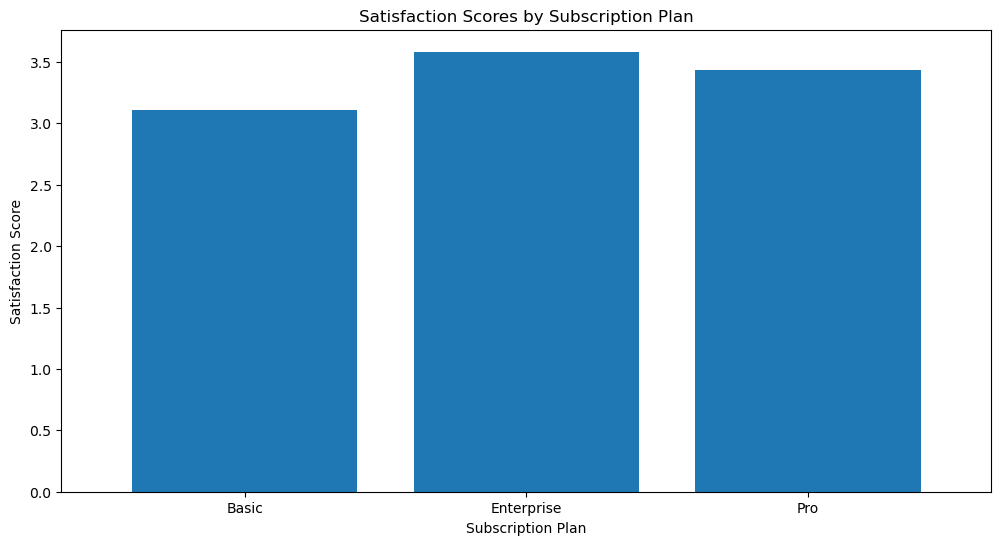

In [146]:
subscription_satisfaction_summary.plot(kind="bar", figsize=(12,6), width=0.8)
plt.title("Satisfaction Scores by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=0)
plt.show()

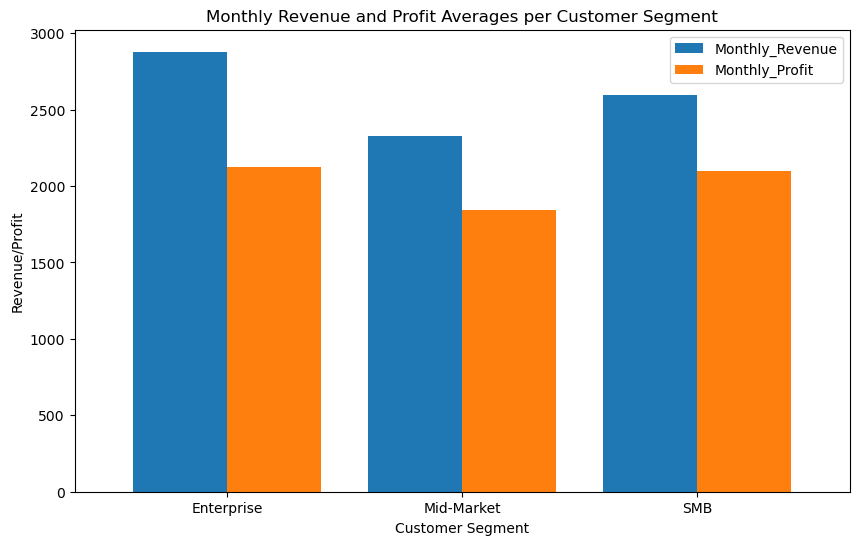

In [148]:
segment_sales_summary.plot(kind="bar", figsize=(10,6), width=0.8)
plt.title("Monthly Revenue and Profit Averages per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Revenue/Profit")
plt.xticks(rotation=0)
plt.show()

In [150]:
correlation_matrix = sales_ops_df[["Monthly_Revenue", "Monthly_Profit", "Customer_Satisfaction", "Active_Users"]].corr()
display(correlation_matrix)

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction,Active_Users
Monthly_Revenue,1.000000,0.001962,-0.044544,0.002587
Monthly_Profit,0.001962,1.000000,-0.184682,-0.053263
Customer_Satisfaction,-0.044544,-0.184682,1.000000,-0.135288
Active_Users,0.002587,-0.053263,-0.135288,1.000000


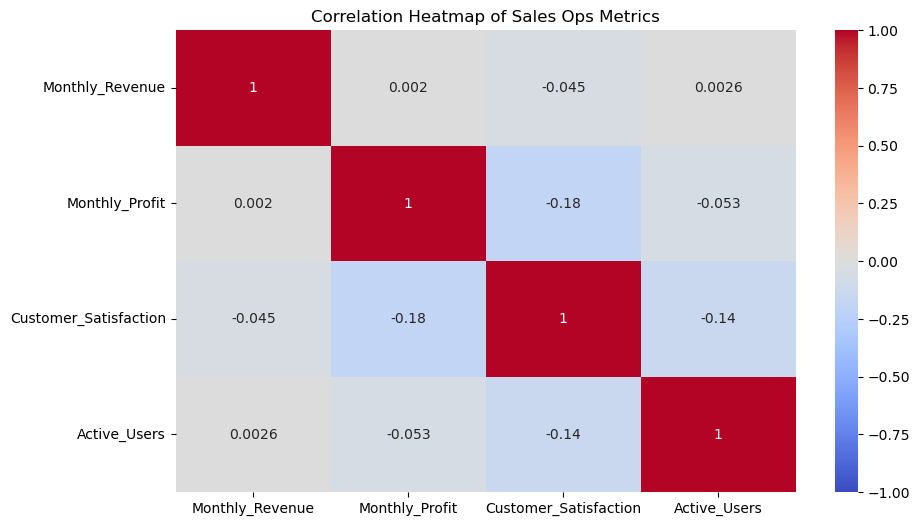

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Sales Ops Metrics")
plt.show()
# we can see here no significant correlations between any of the selected metrics

In [154]:
customer_segment_df = merged_df.groupby("Customer_Segment")[["Monthly_Revenue", "Monthly_Profit", "Customer_Satisfaction"]].mean()
display(customer_segment_df)

,Monthly_Revenue,Monthly_Profit,Customer_Satisfaction
Customer_Segment,,,
Enterprise,2844.247083,1965.933958,3.395349
Mid-Market,2308.655294,1913.000882,2.931034
SMB,2668.882059,2049.059559,3.822222


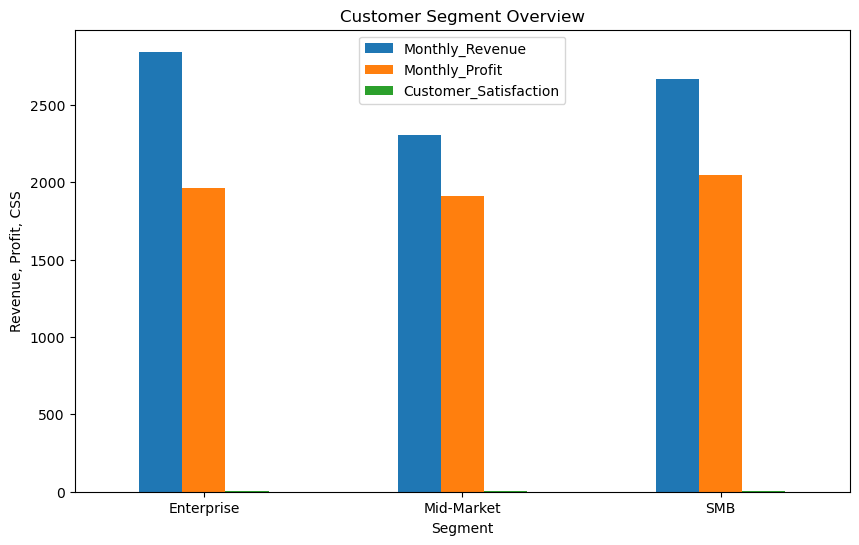

In [120]:
customer_segment_df.plot(kind="bar", figsize=(10,6))
plt.title("Customer Segment Overview")
plt.xlabel("Segment")
plt.ylabel("Revenue, Profit, CSS")
plt.xticks(rotation=0)
plt.show()

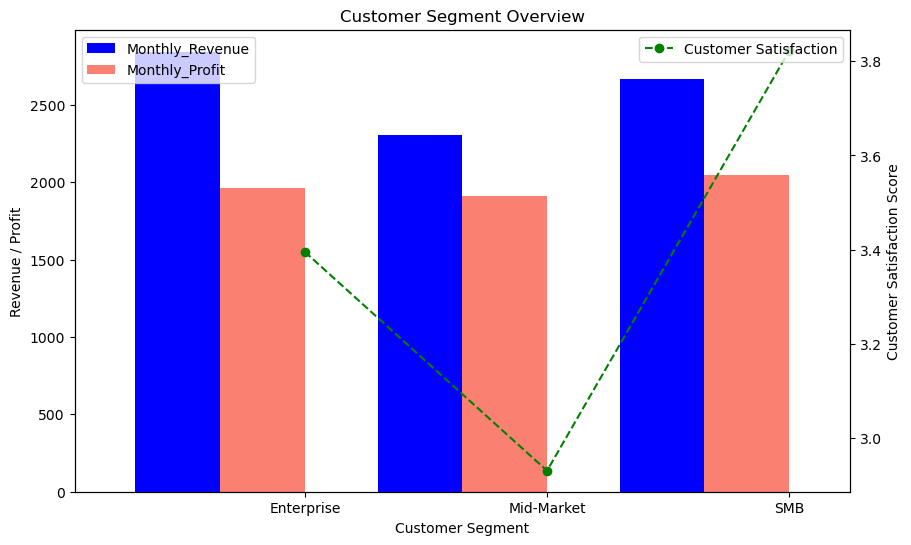

In [182]:
fig, ax1 = plt.subplots(figsize=(10,6))
customer_segment_df[["Monthly_Revenue", "Monthly_Profit"]].plot(kind="bar", ax=ax1, width=0.7, position=1, color=["blue", "salmon"])
ax1.set_xlabel("Customer Segment")
ax1.set_ylabel("Revenue / Profit")
ax1.set_title("Customer Segment Overview")
ax1.tick_params(axis="y")
ax1.legend(loc="upper left")
plt.xticks(rotation=0)

ax2 = ax1.twinx()
ax2.plot(customer_segment_df["Customer_Satisfaction"], color="green", marker="o", linestyle="--", label="Customer Satisfaction")
ax2.set_ylabel("Customer Satisfaction Score")
ax2.tick_params(axis="y")
ax2.legend(loc="upper right")

plt.show()